### Importing the Packages

In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### Loading and Reviewing the data

In [2]:
# load the data
# creating the dataframe(df)
df=pd.read_csv('E:\Imarticus\Machine Learning\Paper1/bank.csv',sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# shape of the dataframe
df.shape #=>41188 rows and 21 columns

(41188, 21)

In [4]:
#number of attributes
df.shape[1]

21

In [5]:
# column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# description of the data
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [8]:
#Numeric columns
num_col=df.select_dtypes(exclude="O").columns
#categorical columns
cat_col=df.select_dtypes(include="O").columns
print("categorial columns :",cat_col)
print("Numeric columns :",num_col)

categorial columns : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Numeric columns : Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


<AxesSubplot:>

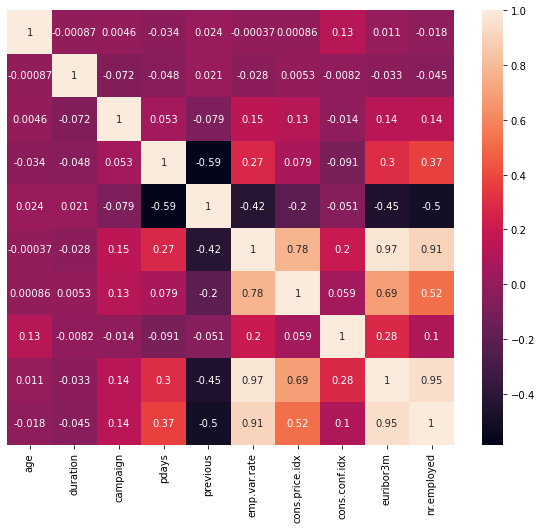

In [9]:
# visualizing the correleation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

### Treating the Missing Values

In [10]:
# checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

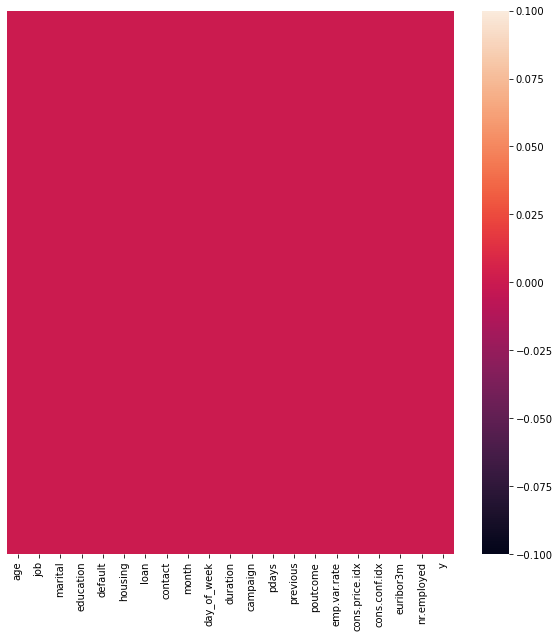

In [11]:
#visualizing the missing values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False)

## visualizing the relationship between the categorical labels

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


<AxesSubplot:xlabel='job'>

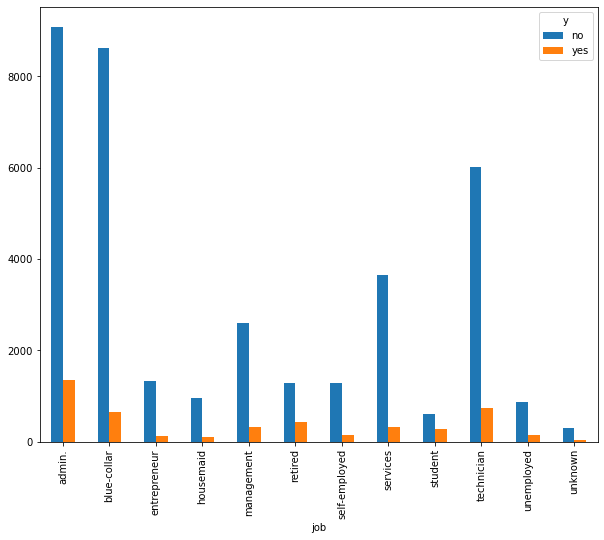

In [12]:
# Cross tabulation between job and y
CrosstabResult=pd.crosstab(index=df['job'],columns=df['y'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(10,8))

### from the chart we see that
###   => admins,blue_collar and technician have more number of term deposit

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


<AxesSubplot:xlabel='marital'>

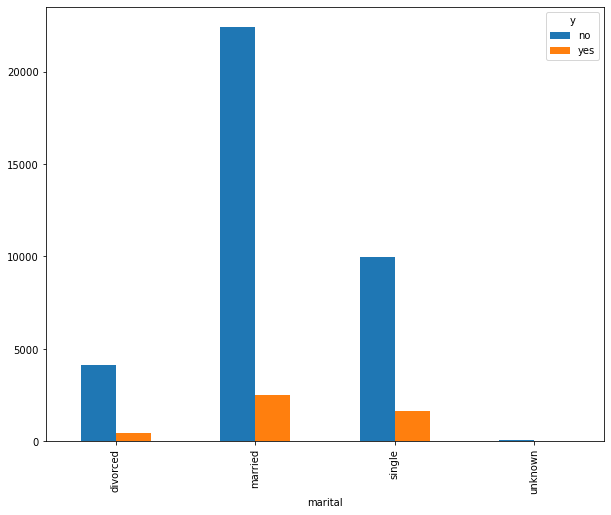

In [13]:
# Cross tabulation between marital and y
CrosstabResult=pd.crosstab(index=df['marital'],columns=df['y'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(10,8))

### from the chart we can analyse => that married people tend to have larger number of term deposit
###                              =>singles are second in nubers to have lot of term deposite
###                             =>we can also see a lot of people do not have a term deposite

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


<AxesSubplot:xlabel='loan'>

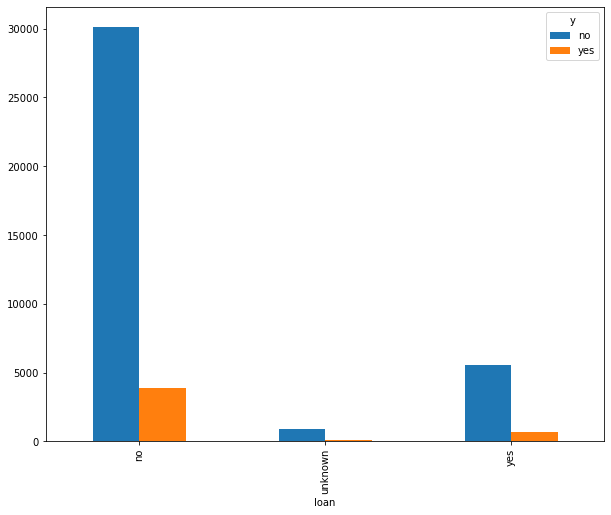

In [14]:
# Cross tabulation between loan and y
CrosstabResult=pd.crosstab(index=df['loan'],columns=df['y'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize=(10,8))

### from th chart we can say people who do not have loans tend to have lot of term deposite than the people who have loans

<AxesSubplot:xlabel='y', ylabel='count'>

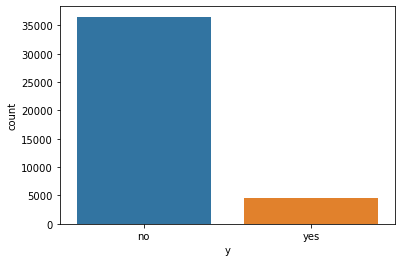

In [15]:
#plot to count each class
sns.countplot(df['y']) 

### the plot shows that it is an imbalanced data

In [16]:
# label encode the categorical columns
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in cat_col:
    df[i]= label_encoder.fit_transform(df[i])

In [17]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2454,54,1,1,0,1,0,0,1,6,3,...,1,999,0,1,1.1,93.994,-36.4,4.856,5191.0,0
16676,38,1,1,2,0,2,0,0,3,4,...,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1,0
39037,48,9,1,5,0,2,2,0,2,1,...,3,999,0,1,-3.0,92.713,-33.0,0.715,5023.5,0
13228,28,9,1,6,0,2,0,0,3,4,...,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
1761,53,4,1,0,0,2,0,1,6,0,...,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0


### Train And Test Data

In [18]:
x=df.drop('y',axis=1)
y=df['y']

In [19]:
# spliting train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=0.30,random_state=0)

### Building Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, 
                             min_samples_split=4,
                             max_features='auto',
                             max_depth=40,
                             criterion='entropy',
                             random_state=0, 
                             n_jobs=-4, verbose =1)
rfc.fit(x_train, y_train)
#Train data
print("Train Score: ",rfc.score(x_train,y_train))
print("Test Score: ",rfc.score(x_test,y_test))

[Parallel(n_jobs=-4)]: Using backend ThreadingBackend with 9 concurrent workers.
[Parallel(n_jobs=-4)]: Done  32 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-4)]: Done 182 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-4)]: Done 432 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-4)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=9)]: Using backend ThreadingBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:    0.1s
[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:    0.4s
[Parallel(n_jobs=9)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=9)]: Using backend ThreadingBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:    0.0s


Train Score:  0.9960806076792341


[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:    0.1s


Test Score:  0.9173747673383508


[Parallel(n_jobs=9)]: Done 432 tasks      | elapsed:    0.3s
[Parallel(n_jobs=9)]: Done 500 out of 500 | elapsed:    0.3s finished


In [21]:
# Selecting features using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

4

In [22]:
selected_feat

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')

In [23]:
# ! pip install imblearn

In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, Y_train = sm.fit_resample(x_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))
print("After OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 3252
Before OverSampling, counts of label '0': 25579 

After OverSampling, the shape of train_X: (51158, 20)
After OverSampling, the shape of train_y: (51158,) 

After OverSampling, counts of label '1': 25579
After OverSampling, counts of label '0': 25579


<AxesSubplot:ylabel='count'>

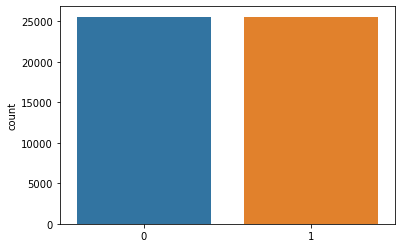

In [25]:
sns.countplot(Y_train)

### the data is now balanced

In [26]:
# scaling the data
# using standardscaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_ss=ss.fit_transform(X_train)
x_test_ss=ss.transform(x_test)

In [27]:
# using minmax scaler
from sklearn.preprocessing import RobustScaler 
rs=RobustScaler()
x_train_rs=rs.fit_transform(X_train)
x_test_rs=rs.transform(x_test)

# Models

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_ss,Y_train)# using data that is scaled using standardscaler

LogisticRegression()

In [29]:
print("train score : ",model.score(x_train_ss,Y_train))
print("test score : ",model.score(x_test_ss,y_test))
lg_train=model.score(x_train_ss,Y_train)
lg_test=model.score(x_test_ss,y_test)

train score :  0.8831072364048633
test score :  0.868657441126487


<AxesSubplot:>

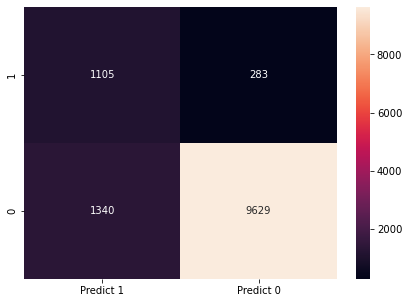

In [30]:
predictions=model.predict(x_test_ss)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [31]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10969
           1       0.45      0.80      0.58      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.84      0.75     12357
weighted avg       0.91      0.87      0.88     12357



In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_rs,Y_train)# using data that is scaled using Robustscaler

LogisticRegression()

In [33]:
print("train score : ",model.score(x_train_rs,Y_train))
print("test score : ",model.score(x_test_rs,y_test))

train score :  0.8794909887016693
test score :  0.866391518977098


In [34]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10969
           1       0.45      0.80      0.58      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.84      0.75     12357
weighted avg       0.91      0.87      0.88     12357



<AxesSubplot:>

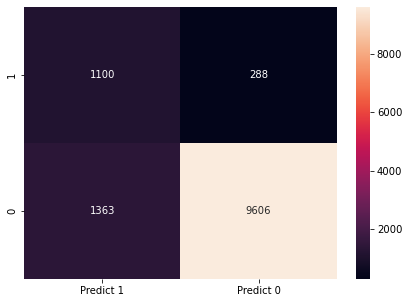

In [35]:
predictions=model.predict(x_test_rs)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

# Ada Boost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc.fit(x_train_ss, Y_train)# using data that is scaled using standardscaler

AdaBoostClassifier(learning_rate=1)

<AxesSubplot:>

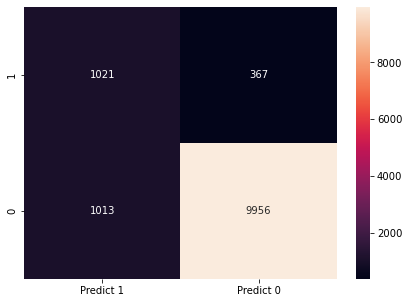

In [37]:
predictions=abc.predict(x_test_ss)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [38]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10969
           1       0.50      0.74      0.60      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.82      0.77     12357
weighted avg       0.91      0.89      0.90     12357



In [39]:
print("train score : ",abc.score(x_train_ss,Y_train))
print("test score : ",abc.score(x_test_ss,y_test))
abc_train=abc.score(x_train_ss,Y_train)
abc_test=abc.score(x_test_ss,y_test)

train score :  0.9080691191993432
test score :  0.8883224083515416


In [40]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc.fit(x_train_rs, Y_train)# using data that is scaled using Robustscaler

AdaBoostClassifier(learning_rate=1)

<AxesSubplot:>

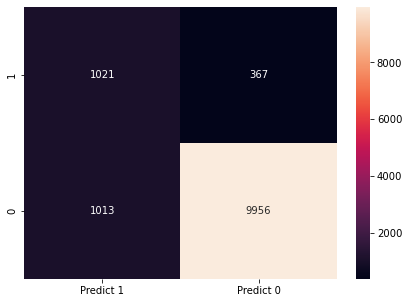

In [41]:
predictions=abc.predict(x_test_rs)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [42]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10969
           1       0.50      0.74      0.60      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.82      0.77     12357
weighted avg       0.91      0.89      0.90     12357



In [43]:
print("train score : ",abc.score(x_train_rs,Y_train))
print("test score : ",abc.score(x_test_rs,y_test))

train score :  0.9080691191993432
test score :  0.8883224083515416


# Naive_Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB 
m = GaussianNB()
m.fit(x_train_ss, Y_train)# using data that is scaled using standardscaler

GaussianNB()

<AxesSubplot:>

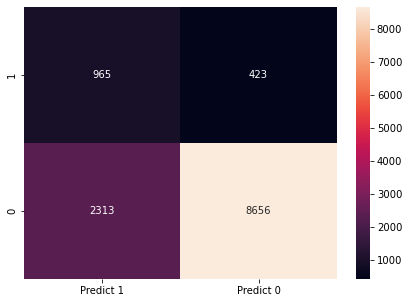

In [45]:
predictions=m.predict(x_test_ss)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [46]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10969
           1       0.29      0.70      0.41      1388

    accuracy                           0.78     12357
   macro avg       0.62      0.74      0.64     12357
weighted avg       0.88      0.78      0.81     12357



In [47]:
print("train score : ",m.score(x_train_ss,Y_train))
print("test score : ",m.score(x_test_ss,y_test))
m_train=m.score(x_train_ss,Y_train)
m_test=m.score(x_test_ss,y_test)

train score :  0.7904531060635678
test score :  0.7785870356882738


In [48]:
m = GaussianNB()
m.fit(x_train_rs, Y_train)# using data that is scaled using Robustscaler

GaussianNB()

<AxesSubplot:>

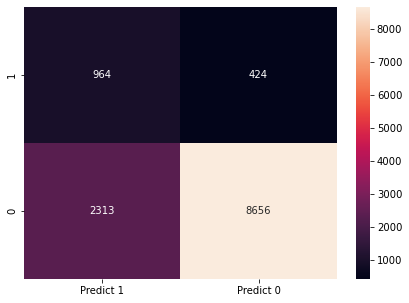

In [49]:
predictions=m.predict(x_test_rs)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [50]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10969
           1       0.29      0.69      0.41      1388

    accuracy                           0.78     12357
   macro avg       0.62      0.74      0.64     12357
weighted avg       0.88      0.78      0.81     12357



In [51]:
print("train score : ",m.score(x_train_rs,Y_train))
print("test score : ",m.score(x_test_rs,y_test))

train score :  0.7904335587786856
test score :  0.7785061098972242


# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

Near = KNeighborsClassifier(n_neighbors = 5 ,metric='euclidean' )
Near.fit(x_train_ss, Y_train)
print("Train Score: ",Near.score(x_train_ss, Y_train))
print("Test Score: ",Near.score(x_test_ss, y_test))
knn_train=Near.score(x_train_ss,Y_train)
knn_test=Near.score(x_test_ss,y_test)

Train Score:  0.9472027835333672
Test Score:  0.8716516953953225


<AxesSubplot:>

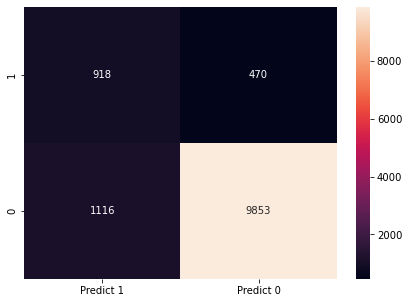

In [53]:
predictions=Near.predict(x_test_ss)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [54]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     10969
           1       0.45      0.66      0.54      1388

    accuracy                           0.87     12357
   macro avg       0.70      0.78      0.73     12357
weighted avg       0.90      0.87      0.88     12357



In [55]:
from sklearn.neighbors import KNeighborsClassifier

Near = KNeighborsClassifier(n_neighbors = 5 ,metric='euclidean' )
Near.fit(x_train_rs, Y_train)
print("Train Score: ",Near.score(x_train_rs, Y_train))
print("Test Score: ",Near.score(x_test_rs, y_test))

Train Score:  0.9447007310684546
Test Score:  0.8684146637533382


<AxesSubplot:>

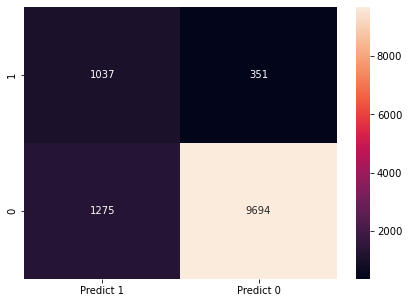

In [56]:
predictions=Near.predict(x_test_rs)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [57]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10969
           1       0.45      0.75      0.56      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.82      0.74     12357
weighted avg       0.91      0.87      0.88     12357



# SVM

In [58]:
from sklearn import svm
support = svm.SVC()
support.fit(x_train_ss, Y_train)
print("Train Score: ",support.score(x_train_ss, Y_train))
print("Test Score: ",support.score(x_test_ss, y_test))
svm_train=support.score(x_train_ss,Y_train)
svm_test=support.score(x_test_ss,y_test)

Train Score:  0.9323663943078306
Test Score:  0.8873512988589464


<AxesSubplot:>

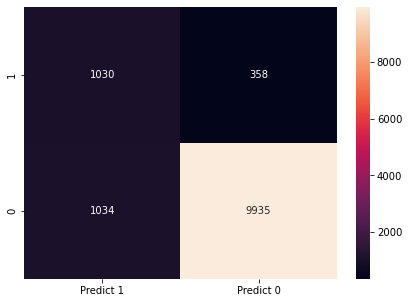

In [59]:
predictions=support.predict(x_test_ss)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [60]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.93     10969
           1       0.50      0.74      0.60      1388

    accuracy                           0.89     12357
   macro avg       0.73      0.82      0.77     12357
weighted avg       0.91      0.89      0.90     12357



In [61]:
model_summary = {"Model": ["Logistic", "Adaboost",
                           "NaiveBayes", "KNN" , "SVM"],
                "TrainScore": [lg_train,abc_train,m_train,knn_train,svm_train],
                "TestScore":[lg_test,abc_test,m_test,knn_test,svm_test]}
pd.DataFrame(model_summary)

,Model,TrainScore,TestScore
0,Logistic,0.883107,0.868657
1,Adaboost,0.908069,0.888322
2,NaiveBayes,0.790453,0.778587
3,KNN,0.947203,0.871652
4,SVM,0.932366,0.887351
